In [19]:
%matplotlib inline

In [20]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
#Data table for mouse_drug_data
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [21]:
#Data table for clinical trial data
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [22]:
# Combine the data into a single dataset
all_data = pd.merge(clinical_trial_data,mouse_drug_data,on = "Mouse ID")

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# Tumor Response to Treatment

In [23]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drugdata = all_data.groupby(['Drug','Timepoint'])
# Convert to DataFrame
Tumorvolume = pd.DataFrame(drugdata['Tumor Volume (mm3)'].mean())
Tumorvolume.reset_index(inplace=True)
# Preview DataFrame
Tumorvolume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_error= pd.DataFrame(drugdata['Tumor Volume (mm3)'].sem())
Tumor_error.rename(columns={'Tumor Volume (mm3)':'Tumor vol Std.error'},inplace = True)
Tumor_error.reset_index(inplace=True)
# Preview DataFrame
Tumor_error.head()

,Drug,Timepoint,Tumor vol Std.error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [25]:
# Minor Data Munging to Re-Format the Data Frames

Tumor_response_pivot = pd.pivot_table(Tumorvolume, index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"])
Tumor_response_pivot.head()
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


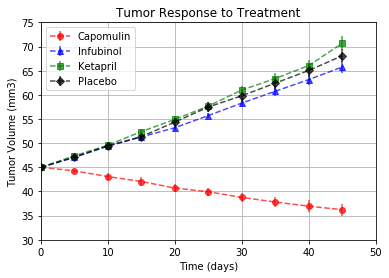

In [26]:
# set up lists for  the scatter plot
drugs = ['Capomulin','Infubinol', 'Ketapril','Placebo']
colors = ['red','blue','green','black']
formats = ['o','^','s','D']
#loop through the drugs to include on the plot
for i in range(0,len(drugs)):
  
#x-axis is timepoint for the particular drug
    drugdata_to_plot = Tumorvolume.loc[Tumorvolume['Drug'] == drugs[i],:]
    x_axis = drugdata_to_plot['Timepoint']
      
#y-axis is tumor volume
    y_axis = drugdata_to_plot['Tumor Volume (mm3)'] 
    
#errors is the standard error
    err_data_to_plot = Tumor_error.loc[Tumor_error['Drug'] == drugs[i],:]
    errors = err_data_to_plot['Tumor vol Std.error']
   
# Show the Figure
#plot the data and the error
    plt.errorbar(x_axis, y_axis, yerr=errors, fmt=formats[i], marker = formats[i], color=colors[i],
            alpha=0.7, label=drugs[i],ls='dashed')   
    #plt.scatter(x_axis, y_axis, marker= formats[i], facecolors= colors[i], edgecolors="black",
           # s=x_axis, alpha=1)
    # Add legend
    plt.legend(loc="best")

# Add labels
    plt.title('Tumor Response to Treatment')
    plt.xlabel('Time (days)')
    plt.ylabel('Tumor Volume (mm3)')

# Add x limits and y limits
    plt.xlim(0,50)
    plt.ylim(30,75)
   # Add gridlines
plt.grid()
plt.show()


# #Metastatic Response to Treatment

In [61]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = drugdata['Metastatic Sites'].mean()
# Convert to DataFrame
met_site = pd.DataFrame(met_site)
met_site.rename(columns={'Metastatic Sites':'Metastatic mean'},inplace = True)
met_site.reset_index(inplace=True)
# Preview DataFrame
met_site.head()

,Drug,Timepoint,Metastatic mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [47]:
#compute the error from the means
met_error = drugdata['Metastatic Sites'].sem()
met_error = pd.DataFrame(met_error)
met_error.rename(columns={'Metastatic Sites':'met errors'},inplace = True)
met_error.reset_index(inplace=True)

met_error.head()

,Drug,Timepoint,met errors
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


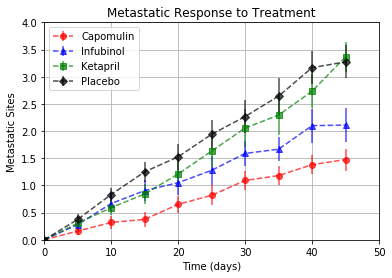

In [71]:
# set up lists for  the scatter plot
drugs = ['Capomulin','Infubinol', 'Ketapril','Placebo']
colors = ['red','blue','green','black']
formats = ['o','^','s','D']
#loop through the drugs to include on the plot
for i in range(0,len(drugs)):
 
    #x-axis is timepoint for the particular drug
    drug_data_to_plot = met_site.loc[met_site['Drug'] == drugs[i],:]
    x_axis = drug_data_to_plot['Timepoint']
      
    #y-axis is metastatic sites
    y_axis = drug_data_to_plot['Metastatic mean'] 

    #errors is the standard error
    err_data_to_plot = met_error.loc[met_error['Drug'] == drugs[i],:]
    errors = err_data_to_plot['met errors']
   
 #plot the data and the error
    plt.errorbar(x_axis, y_axis, yerr=errors, fmt=formats[i], marker = formats[i], color=colors[i],
            alpha=0.7, label=drugs[i],ls='dashed')   
    
    # Add legend
    plt.legend(loc="best")

# Add labels
    plt.title('Metastatic Response to Treatment')
    plt.xlabel('Time (days)')
    plt.ylabel('Metastatic Sites')

# Add x limits and y limits
    plt.xlim(0,50)
    plt.ylim(0,4)
    
# Add gridlines
plt.grid()
plt.show()  
   


# Survival Rates


In [97]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse = all_data.groupby(["Drug", "Timepoint"])
mouse.head()
mouse['Mouse ID'].count()
survival = pd.DataFrame(mouse['Mouse ID'].count())
survival.head()
survival.rename(columns={'Mouse ID':'MouseCount'},inplace = True)
survival.reset_index(inplace=True)
survival.head()



,Drug,Timepoint,MouseCount
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [106]:
#get drug and number of mice at timepoint 0
orig_mice = survival.loc[(survival["Timepoint"] == 0),:]
orig_mice.rename(columns={'MouseCount':'Total_mice'},inplace = True)
del orig_mice['Timepoint']

orig_mice

,Drug,Total_mice
0,Capomulin,25
10,Ceftamin,25
20,Infubinol,25
30,Ketapril,25
40,Naftisol,25
50,Placebo,25
60,Propriva,26
70,Ramicane,25
80,Stelasyn,26
90,Zoniferol,25


In [107]:
#merge the table with the original total mouse count with survival_drug
merge_survival = pd.merge(survival, orig_mice, on="Drug")
merge_survival.head()

,Drug,Timepoint,MouseCount,Total_mice
0,Capomulin,0,25,25
1,Capomulin,5,25,25
2,Capomulin,10,25,25
3,Capomulin,15,24,25
4,Capomulin,20,23,25


In [109]:
#store the percentage of mice still alive
merge_survival["%alive"] = merge_survival['MouseCount'] / merge_survival['Total_mice'] * 100
merge_survival.head()

,Drug,Timepoint,MouseCount,Total_mice,%alive
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0


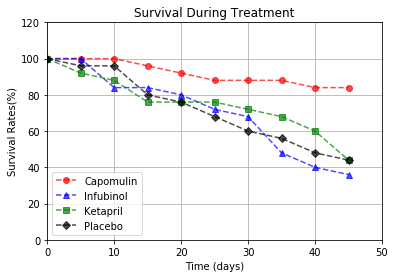

In [115]:
# Generate the Plot (Accounting for percentages)
 #set up lists for  the scatter plot
drugs = ['Capomulin','Infubinol', 'Ketapril','Placebo']
colors = ['red','blue','green','black']
formats = ['o','^','s','D']
#loop through the drugs to include on the plot
for i in range(0,len(drugs)):
 
    #x-axis is timepoint for the particular drug
    drug_data_to_plot = merge_survival.loc[merge_survival['Drug'] == drugs[i],:]
    x_axis = drug_data_to_plot['Timepoint']
      
    #y-axis is metastatic sites
    y_axis = drug_data_to_plot['%alive'] 

    #errors is the standard error
    #err_data_to_plot = met_error.loc[met_error['Drug'] == drugs[i],:]
    #errors = err_data_to_plot['met errors']
   
 #plot the data and the error
    plt.errorbar(x_axis, y_axis, fmt=formats[i], marker = formats[i], color=colors[i],
            alpha=0.7, label=drugs[i],ls='dashed')   
    
    # Add legend
    plt.legend(loc="best")

# Add label 
    plt.title("Survival During Treatment")
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Rates(%)')

# Add x limits and y limits
    plt.xlim(0,50)
    plt.ylim(0,120)
    
# Add gridlines
plt.grid()
plt.show()  
# Save the Figure

# Show the Figure
plt.show()

# Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm